In [14]:
import sys
sys.path.insert(0, "../")
import numpy as np
import matplotlib.pyplot as plt
import rebound
from scipy import signal
from src.utilities.constants import rad2Deg, m2au, sec2year

In [2]:
with open("/Users/bethclark/Projects/Flora_Family/data/misc_data/walsh_yarko_ae_inits.txt") as txt:
    init_data = txt.readlines()
init_data = [(float(d.split(',')[0]), float(d.split(',')[1])) for d in init_data]
init_data_x = [d[0] for d in init_data]
init_data_y = [d[1] for d in init_data]

Text(0.5, 1.0, 'Walsh et al. 2012 Fig 3\n -RM with Rebound')

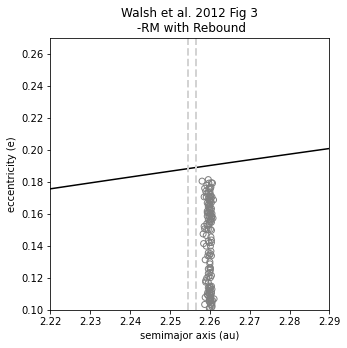

In [3]:
semis = np.linspace(2.22, 2.29)
mars_a = 1.83
mars_cross_limit = 1 - mars_a/semis

fig = plt.figure(figsize = (5,5))
plt.plot(semis, mars_cross_limit, c= 'black')
plt.scatter(init_data_x, init_data_y, facecolors='none', edgecolors='grey')
ax = plt.gca()
ax.axvline(2.2565, ls='--', c='lightgrey', lw=2)
ax.axvline(2.2546, ls='--', c='lightgrey', lw=2)
plt.xlim(2.22, 2.29)
plt.ylim(0.1, 0.27)
plt.xlabel('semimajor axis (au)')
plt.ylabel('eccentricity (e)')
plt.title('Walsh et al. 2012 Fig 3\n -RM with Rebound')

In [4]:
sim = rebound.Simulation('../data/sim_inits/2020_12_17_sim.bin')
sim.remove(hash="Mercury")
sim.move_to_hel()
sim.N_active = sim.N
print("Number of Major Bodies: {}".format(sim.N))
for d in init_data:
    a = d[0]/m2au
    e = d[1]
    if e > 0.175:
        sim.add(m=0, a=a, e=e, inc=1.99/rad2Deg, primary = sim.particles[0])
print("Number of Added Palona Members: {}".format(sim.N - sim.N_active))

#sim.save('/Users/bethclark/Projects/Flora_Family/data/sim_inits/walsh_yarko_high_e.bin')

Number of Major Bodies: 8
Number of Added Palona Members: 11


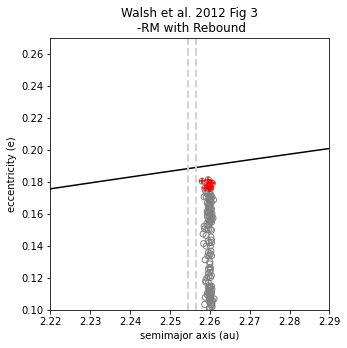

In [61]:
for p in sim.particles[8:]:
    # o = p.calculate_orbit()
    # ax.scatter(o.a*m2au, o.e, marker='+', c='blue')
    o = p.calculate_orbit(sim.particles[0])
    ax.scatter(o.a*m2au, o.e, marker='+', c='red')
fig

In [5]:
sa = rebound.SimulationArchive("/Users/bethclark/Projects/Flora_Family/src_C/walsh_yarko/walsh_yarko_100Myr_high_e_test.bin")
len(sa)

201

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


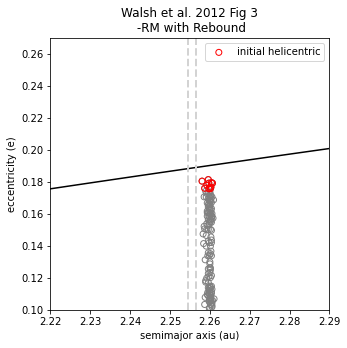

In [6]:
sim = sa[0]
a_j, e_j, a_h, e_h = ([], [], [], [])
for p in sim.particles[8:]:
    o = p.calculate_orbit()
    a_j.append(o.a*m2au)
    e_j.append(o.e)

    o = p.calculate_orbit(sim.particles[0])
    a_h.append(o.a*m2au)
    e_h.append(o.e)

# ax.scatter(a_j, e_j, facecolors='none', edgecolors='blue', label = 'initial jacobian')
ax.scatter(a_h, e_h, facecolors='none', edgecolors='red', label = 'initial helicentric')
ax.legend()
fig

In [7]:
sim = sa[-1]
'{:.5e}'.format(sim.t/sec2year)

'1.00000e+08'

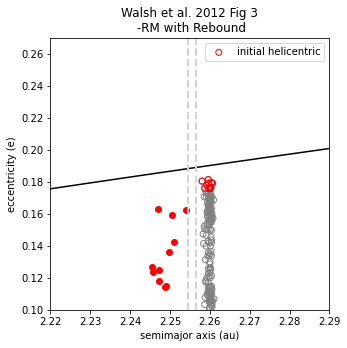

In [8]:
for p in sim.particles[8:]:
    # o = p.calculate_orbit()
    # ax.scatter(o.a*m2au, o.e, c='blue')
    o = p.calculate_orbit(sim.particles[0])
    ax.scatter(o.a*m2au, o.e, c='red')
fig

In [9]:
ps = sim.particles
osculating_elements = {}
for i, p in enumerate(ps[8:]):
    osculating_elements[i] = {'a':[], 'e':[], 'i':[]}

times = np.linspace(sim.t, sim.t+2e6*sec2year, int(2e4)+1)
for t in times:
    sim.integrate(t)
    for i, p in enumerate(ps[8:]):
        o = p.calculate_orbit(ps[0])
        osculating_elements[i]['a'].append(o.a*m2au)
        osculating_elements[i]['e'].append(o.e)
        osculating_elements[i]['i'].append(o.inc)
'{:.5e}'.format(sim.t/sec2year)

'1.02000e+08'

Text(0, 0.5, 'i (deg)')

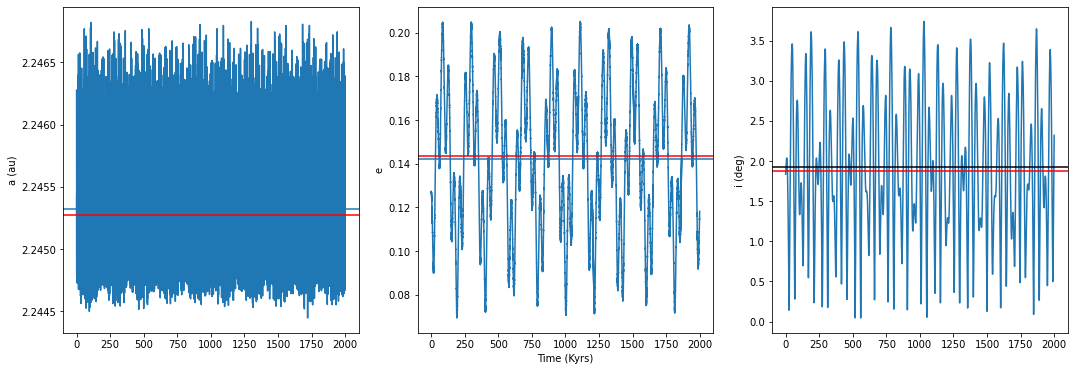

In [10]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.plot((times/sec2year-1e8)/1000, osculating_elements[0]['a'])
plt.axhline(np.mean(osculating_elements[0]['a']))
plt.axhline(np.median(osculating_elements[0]['a']), c='r')
plt.ylabel('a (au)')

plt.subplot(1, 3, 2)
plt.plot((times/sec2year-1e8)/1000, osculating_elements[0]['e'])
plt.axhline(np.mean(osculating_elements[0]['e']))
plt.axhline(np.median(osculating_elements[0]['e']), c='r')
plt.ylabel('e')
plt.xlabel('Time (Kyrs)')

plt.subplot(1, 3, 3)
plt.plot((times/sec2year-1e8)/1000, [i*rad2Deg for i in osculating_elements[0]['i']])
plt.axhline(np.mean(osculating_elements[0]['i'])*rad2Deg, c='k')
plt.axhline(np.median(osculating_elements[0]['i'])*rad2Deg, c='r')
plt.ylabel('i (deg)')

20001
0.1
/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0.0, 0.06)

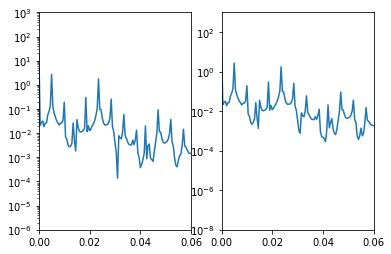

In [40]:
f = osculating_elements[1]['e']
n = len(f)
print(n)
dt = (times[1]-times[0])/sec2year/1000
print(dt)
fhat = np.fft.fft(f)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)

Ws = int(1/dt)
Wp = 1.5
lpass = signal.firwin(20001, Wp, width=.1, fs=Ws) # lowpass filter

plt.subplot(1,2,1)
plt.semilogy(freq, np.sqrt(PSD))
plt.ylim(1e-6, 1e3)
plt.xlim(0, .06)

f_lp = np.convolve(lpass, f, 'same')
fhat_lp = np.fft.fft(f_lp)
# fhat_lp = fhat*np.fft.fft(lpass)
PSD_lp = fhat_lp * np.conj(fhat_lp) / n

plt.subplot(1,2,2)
plt.semilogy(freq, np.sqrt(PSD_lp))
plt.ylim(1e-8, 1e3)
plt.xlim(0, .06)

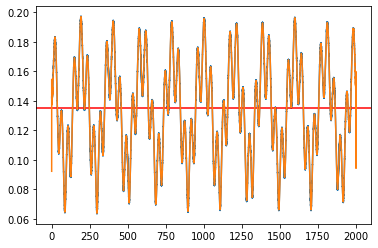

In [37]:
plt.plot((times/sec2year-1e8)/1000, osculating_elements[1]['e'])
plt.axhline(np.median(osculating_elements[1]['e']), c='r')
plt.plot((times/sec2year-1e8)/1000, f_lp)

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


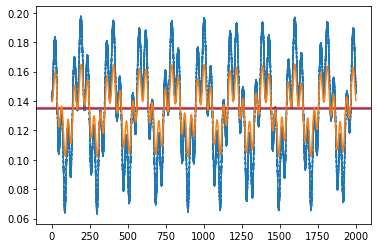

In [246]:
plt.plot((times/sec2year-1e8)/1000, osculating_elements[1]['e'])
plt.axhline(np.mean(osculating_elements[1]['e']))
plt.axhline(np.median(osculating_elements[1]['e']), c='r')
plt.plot((times/sec2year-1e8)/1000, ffilt)

<ipython-input-27-a7321cdf7646>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogy(1/(freq/(2*np.pi)*Ws), ampl, 'b-')


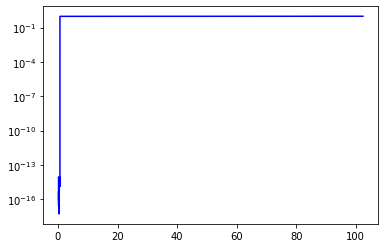

In [27]:
Ws = int(1/dt)
Wp = 1.5
lpass = signal.firwin(20001, Wp, width=.1, fs=Ws)
freq, response = signal.freqz(lpass)
ampl = np.abs(response)

In [248]:
fhat_clean[0]

(268.90268755957914+1.0713582798693722e-14j)

In [260]:
(times[5000]-times[0])/sec2year

10000.0

/Users/bethclark/Projects/Flora_Family/venv/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


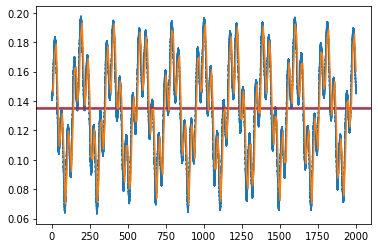

In [266]:
smooth_f = {'t':[], 'e':[]}
smoothing_scale = 5000
e_sum = 0
for i, e in enumerate(f):
    e_sum += e
    if i%smoothing_scale == smoothing_scale-1:
        avg_e = e_sum/smoothing_scale
        smooth_f['t'].append((times[i]/sec2year-1e8)/1000)
        smooth_f['e'].append(avg_e)
        e_sum = 0

n = len(smooth_f['t'])
dt = smooth_f['t'][1]-smooth_f['t'][0]
fhat = np.fft.fft(smooth_f['e'])
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)

# indicies = PSD > .1
indicies = np.concatenate((PSD[:int(n/2) + 1] > 0 , PSD[int(n/2) + 1:] < -1), axis=None)
PSDclean = PSD * indicies
fhat_clean = fhat * indicies
ffilt = np.fft.ifft(np.concatenate((fhat_clean[0], fhat_clean[1:]*2), axis=None))

plt.plot((times/sec2year-1e8)/1000, osculating_elements[1]['e'])
plt.axhline(np.mean(osculating_elements[1]['e']))
plt.axhline(np.median(osculating_elements[1]['e']), c='r')
plt.plot(smooth_f['t'], ffilt)

In [ ]:
plt.plot((times/sec2year-1e8)/1000, osculating_elements[1]['e'])
plt.axhline(np.mean(osculating_elements[1]['e']))
plt.axhline(np.median(osculating_elements[1]['e']), c='r')
plt.plot(smooth_f['t'], smooth_f['e'])
plt.plot(smooth_f['t'], ffilt)

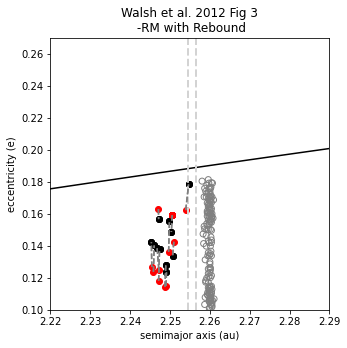

In [99]:
proper_elements = {'a':[], 'e':[]}
for key in osculating_elements:
    proper_elements['a'].append(np.mean(osculating_elements[key]['a']))
    proper_elements['e'].append(np.mean(osculating_elements[key]['e']))
ax.scatter(proper_elements['a'], proper_elements['e'], c='black')
ax.scatter([osculating_elements[key]['a'][0] for key in osculating_elements], [osculating_elements[key]['e'][0] for key in osculating_elements], c='red')
for i in range(len(proper_elements['a'])):
    p1a = osculating_elements[i]['a'][0]
    p2a = proper_elements['a'][i]
    p1e = osculating_elements[i]['e'][0]
    p2e = proper_elements['e'][i]
    ax.plot([p1a, p2a], [p1e, p2e], c='grey', ls='--')
fig

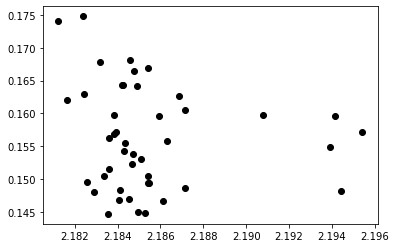

In [81]:
plt.scatter(proper_elements['a'], proper_elements['e'], c='black')

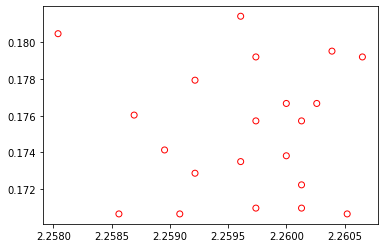

In [11]:
for p in sim.particles[8:]:
    o = p.calculate_orbit()
    plt.scatter(o.a*m2au, o.e, facecolors='none', edgecolors='red')

Text(0.5, 1.0, 'N = 1*D$^{-\\alpha}$, $\\alpha = 2.5$')

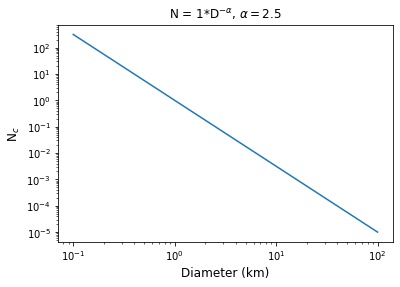

In [46]:
alpha= 2.5
D = np.linspace(.1, 100, 10000)
N = D**-alpha
plt.loglog(D, N)
plt.xlabel('Diameter (km)', fontsize = 12)
plt.ylabel('N$_c$', fontsize = 12)
plt.title('N = 1*D$^{-\\alpha}$, $\\alpha = 2.5$', fontsize = 12)